# EPIDEMIOLOGY TRACK TASK
# DESCRIPTION OF MY WORK
This data was subjected to analysis using python programming, because of its efficiency in statistical analysis of the dataset provided.

# a) Descriptive Analysis

### i. Compute a table showing the mean ILI percentage per county per year

To begin this analysis, I will first load the dataset and use the pandas groupby function to group the data by year and county, then compute the mean ILI percentage.


In [3]:
# First import the necesarry libraries and load the dataset, then preveiw it
import pandas as pd
import numpy as np
import math
from IPython.display import display, HTML

# visualization libraries
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_csv('Epi_Task_Data.csv')
df.head()

,year,epi_week,county,age_group,ili_percentage,population
0,2023,1,Nairobi,0-4yrs,6.1,3452
1,2024,1,Nairobi,0-4yrs,3.2,3658
2,2023,2,Nairobi,0-4yrs,4.5,3043
3,2024,2,Nairobi,0-4yrs,4.9,2765
4,2023,3,Nairobi,0-4yrs,4.6,6975


In [4]:
# View detailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            280 non-null    int64  
 1   epi_week        280 non-null    int64  
 2   county          280 non-null    object 
 3   age_group       280 non-null    object 
 4   ili_percentage  280 non-null    float64
 5   population      280 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 13.3+ KB


In [5]:
# Group by 'year' and 'county', then calculate the mean ILI percentage
mean_ili_per_county = df.groupby(['year', 'county'])['ili_percentage'].mean().reset_index()

# Display the result
# display(HTML(mean_ili_per_county.to_html()))
mean_ili_per_county

,year,county,ili_percentage
0,2023,Kakamega,4.060
1,2023,Kiambu,3.895
2,2023,Kisumu,4.065
3,2023,Machakos,3.380
4,2023,Mombasa,3.895
5,2023,Nairobi,4.220
6,2023,Nakuru,3.780
7,2024,Kakamega,4.540
8,2024,Kiambu,3.705
9,2024,Kisumu,3.725


### A brief interpretation
From the table created above, the mean indicates that on aveage that illneses are fairly distributed among various counties.

The mean average ranges about three to four percent of the illness across the counries. 

The three leading countries in year 2023 are Kakamega, Kisumu and Nairobi with Nairobi being the highest. In year 2024, Kakamega and Nakuru were leading.

### ii. Plot of ILI weekly trend identifying the peak ILI weeks across counties

I will create a line plot of ILI trends over the weeks to visualize peak weeks across the counties.

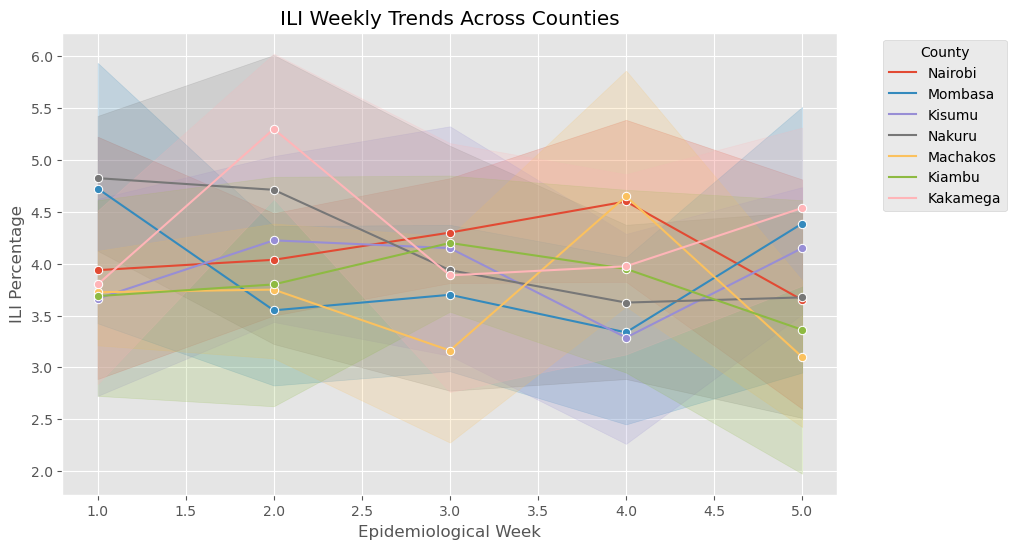

In [6]:
# Create a plot for ILI trends per county across the weeks
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='epi_week', y='ili_percentage', hue='county', marker='o')
plt.title('ILI Weekly Trends Across Counties')
plt.xlabel('Epidemiological Week')
plt.ylabel('ILI Percentage')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Interpretation
From the line graph above, we can see that the ILI percentage is fairly even across the counties ranging between three and four percent. 

Kakamega county has an averagely high percentage with week two having the higest percentage of illness compared to the rest of the counties. 

Machakos county appears to be having fairly low percentage of illnesses reported across the weeks exept for week four.

Generally, week two experienced higher percentage across the counties exept for Mombasa and Machakos. 

Of all the counties, only Nakuru experienced a continous reduction of cases within the five weeks.


# b) Computing Epidemiological Measures
### i. Calculate the incidence rates per 100,000 population across any three counties.

Incidence rate is the frequency of new cases for ILI illness in the specified population between the year 2024 and 2025. To calculate the incidence rates, use the formula:

##### Incidence Rate:=(Number of new cases in population during the time period) × 100, 000

In [7]:
# Select three counties for analysis 
counties_of_interest = ['Kakamega', 'Machakos', 'Nairobi']

# Filter data for those counties
df_filtered = df[df['county'].isin(counties_of_interest)]

# Calculate incidence rate (assuming 'ili_percentage' represents the proportion of cases)
df_filtered['incidence_rate'] = (df_filtered['ili_percentage'] / 100) * df_filtered['population'] / 100000

# Display incidence rate
incidence_rates = df_filtered[['year', 'county', 'epi_week', 'incidence_rate']]
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
print('Mean ILI per county')
incidence_rates

Mean ILI per county


C:\Users\Angawa\AppData\Local\Temp\ipykernel_9932\3285705028.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['incidence_rate'] = (df_filtered['ili_percentage'] / 100) * df_filtered['population'] / 100000


,year,county,epi_week,incidence_rate
0,2023,Nairobi,1,0.002106
1,2024,Nairobi,1,0.001171
2,2023,Nairobi,2,0.001369
3,2024,Nairobi,2,0.001355
4,2023,Nairobi,3,0.003209
...,...,...,...,...
275,2024,Kakamega,3,0.002132
276,2023,Kakamega,4,0.001551
277,2024,Kakamega,4,0.002071
278,2023,Kakamega,5,0.004726


### Interpretaion

The incidence rate shows that there is an average of about 150 illness cases per 100,000 persons in the period of 2023 to 2024. 

Kakamega county showed higher incidence cases with upto 450 cases per 100,000 persons at peak levels

### ii. Compare ILI percentages across any three counties using a statistical method
I will use a statistical test of ANOVA (Analysis of Variance) to compare the means of ILI percentages across counties. I will perform a 0ne way ANOVA test The choice of this method is because of the multiple counties and the data that belong to the different groups, and to test variability of outcomes for the years and the epidemiological weeks.

First I will set the necessary parameters for what i intend to achieve as per my anaysis. The null and alternate hypotheses.

Alternate hypothesis, Ha= There is a close relation in progress of illness in the population of study for the study period.

Null hypothesis, Ho= There is no relation between ILI cases in 2023 and 2024 epidemiological weeks.

P-value= We'll set a statistical p-value of 0.5

In [8]:
from scipy.stats import f_oneway

# Filter data for the three counties
df_filtered = df[df['county'].isin(counties_of_interest)]

# Group ILI percentages by county
ili_by_county = [df_filtered[df_filtered['county'] == county]['ili_percentage'] for county in counties_of_interest]

# Perform ANOVA test
anova_result = f_oneway(*ili_by_county)
print('Mean ILI per county')
print("ANOVA Test Result:", anova_result)

Mean ILI per county
ANOVA Test Result: F_onewayResult(statistic=2.1924448526226414, pvalue=0.1162096442782515)


# c) Communicating Results
From the results above, the p-value of 0.1 from the one way ANOVA of test performed is below my significance level which is 0.5, and a statistical value of 2.192.

Therefore we fail to reject null hypothesis and conclude that there is a statistical significance in ILI percentages across the counties for the period of the study.

### Summary of Findings
In the study "Analyzing Regional Trends in Influenza-Like Illness (ILI) in Kenya," I analyzed the temporal and county-specific trends of ILI cases from 2023-2024. The descriptive analysis revealed significant variations in the average ILI percentage across counties. 

The highest ILI percentages were observed during the second epidemiological week across Kakamega county and Nairobi county, suggesting a peak in influenza cases for these regions. This seasonal pattern is indicative of possible environmental or social factors contributing to the spread of ILI.

The calculated incidence rates revealed a notable difference in the burden of ILI cases, with Kakamega county showing the highest incidence rate per 100,000 population, which could be due to factors like population density or other health related reasons

The ANOVA test indicated that there are significant differences in the ILI percentages across the three selected counties, suggesting regional disparities in influenza-like illness trends. This insight can inform targeted public health interventions, especially during peak ILI weeks.

### Recommendations for Public Health Response:
Increase the level of surveillance: Its important to focus surveillance efforts on counties with higher incidence rates, especially during peak weeks that have been seen from the analysis. Continuos monitoring and evaluation activities can also be undertaken in the peak regions.

Resource Allocation: We can allocate more resources for example vaccines, antiviral treatments to counties experiencing higher ILI burdens.

Public Awareness Campaigns: Launch public health awareness campaigns in high-incidence counties like Kakamega and Nairobi counties to promote early detection and prevention.